In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df = pd.read_csv('doanh_thu_du_lich.csv')
df.head()

,Tỉnh/Thành phố,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Sơ bộ 2023
0,CẢ NƯỚC,"15.539,30","18.852,90","24.820,60","27.799,40","30.444,10","32.530,30","36.111,80","40.371,20","44.669,90","16.492,00","8.998,84","43.505,51","68.966,60"
1,Đồng bằng sông Hồng,"4.226,00","3.479,20","7.347,10","8.140,80","8.543,00","9.071,80","9.583,60","10.507,40","11.556,10","6.128,30","3.938,06","16.873,93","24.533,93"
2,Hà Nội,"4.005,60","3.006,60","6.764,00","7.482,80","7.831,90","8.065,30","8.465,80","9.273,70","10.145,50","5.184,40","3.382,00","14.773,82","20.753,47"
3,Vĩnh Phúc,"6,60","10,60","40,60","68,00","71,50","78,40","83,70","86,70","96,30","73,90","44,70","110,04","258,89"
4,Bắc Ninh,"2,20","3,00","4,90","5,40","12,30","17,80","20,00","23,00","25,00","10,90","2,04","48,78","110,80"


In [222]:
clean_df = df.drop(columns=['2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
clean_df

,Tỉnh/Thành phố,2019,2020,2021,2022,Sơ bộ 2023
0,CẢ NƯỚC,"44.669,90","16.492,00","8.998,84","43.505,51","68.966,60"
1,Đồng bằng sông Hồng,"11.556,10","6.128,30","3.938,06","16.873,93","24.533,93"
2,Hà Nội,"10.145,50","5.184,40","3.382,00","14.773,82","20.753,47"
3,Vĩnh Phúc,"96,30","73,90","44,70","110,04","258,89"
4,Bắc Ninh,"25,00","10,90","2,04","48,78","110,80"
...,...,...,...,...,...,...
65,Cần Thơ,"214,20","64,30","35,90","331,88","397,92"
66,Hậu Giang,..,..,..,"0,54",..
67,Sóc Trăng,"11,40","7,80","3,68","21,91","62,46"
68,Bạc Liêu,"5,00","4,40","2,33","13,43","38,31"


In [224]:
clean_df.rename(columns={'Sơ bộ 2023': '2023'}, inplace=True)

clean_df.replace('..', np.nan, inplace=True)

In [226]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tỉnh/Thành phố  70 non-null     object
 1   2019            68 non-null     object
 2   2020            69 non-null     object
 3   2021            68 non-null     object
 4   2022            69 non-null     object
 5   2023            68 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [228]:
#Hàm chuyển đổi về float
def convert_to_float(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.'))
    return val
for col in clean_df.columns[1:]:
    clean_df[col] = clean_df[col].apply(convert_to_float)

In [230]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tỉnh/Thành phố  70 non-null     object 
 1   2019            68 non-null     float64
 2   2020            69 non-null     float64
 3   2021            68 non-null     float64
 4   2022            69 non-null     float64
 5   2023            68 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.4+ KB


In [232]:
nan_count = clean_df.isnull().sum()
nan_count

Tỉnh/Thành phố    0
2019              2
2020              1
2021              2
2022              1
2023              2
dtype: int64

In [234]:
#Điền dữ liệu thiếu bằng nội suy(Interpolate)
#Bỏ qua cột Tỉnh/Thành phố chỉ nội quy từ cột 2019-2023 
clean_df.iloc[:, 1:] = clean_df.iloc[:, 1:].interpolate(method='linear', inplace=False) # False: theo cột 

In [236]:
print(clean_df.isnull().sum())

Tỉnh/Thành phố    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


In [238]:
clean_df

,Tỉnh/Thành phố,2019,2020,2021,2022,2023
0,CẢ NƯỚC,44669.9,16492.00,8998.84,43505.51,68966.60
1,Đồng bằng sông Hồng,11556.1,6128.30,3938.06,16873.93,24533.93
2,Hà Nội,10145.5,5184.40,3382.00,14773.82,20753.47
3,Vĩnh Phúc,96.3,73.90,44.70,110.04,258.89
4,Bắc Ninh,25.0,10.90,2.04,48.78,110.80
...,...,...,...,...,...,...
65,Cần Thơ,214.2,64.30,35.90,331.88,397.92
66,Hậu Giang,112.8,36.05,19.79,0.54,230.19
67,Sóc Trăng,11.4,7.80,3.68,21.91,62.46
68,Bạc Liêu,5.0,4.40,2.33,13.43,38.31


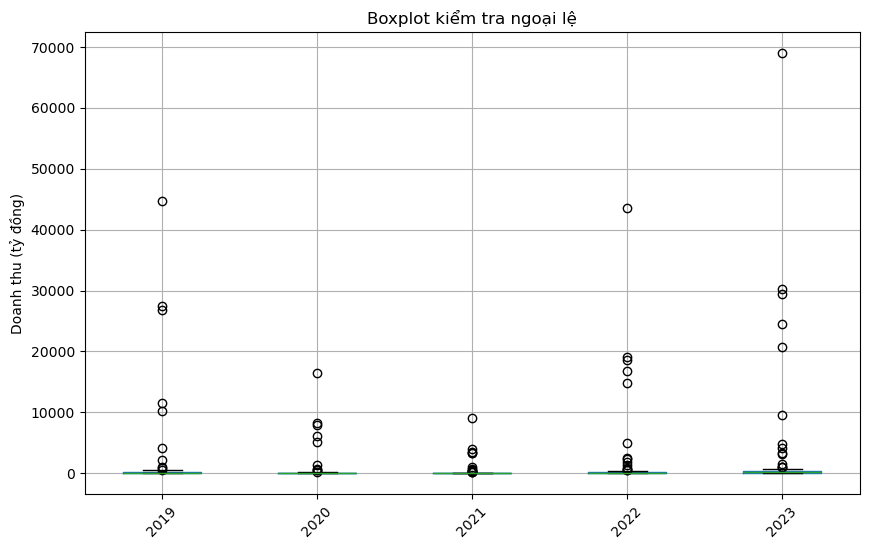

In [240]:
# Boxplot để kiểm tra ngoại lệ 
plt.figure(figsize=(10, 6))
clean_df.iloc[:, 1:].boxplot()
plt.title('Boxplot kiểm tra ngoại lệ')
plt.xticks(rotation=45)
plt.ylabel('Doanh thu (tỷ đồng)')
plt.grid(True)
plt.show()

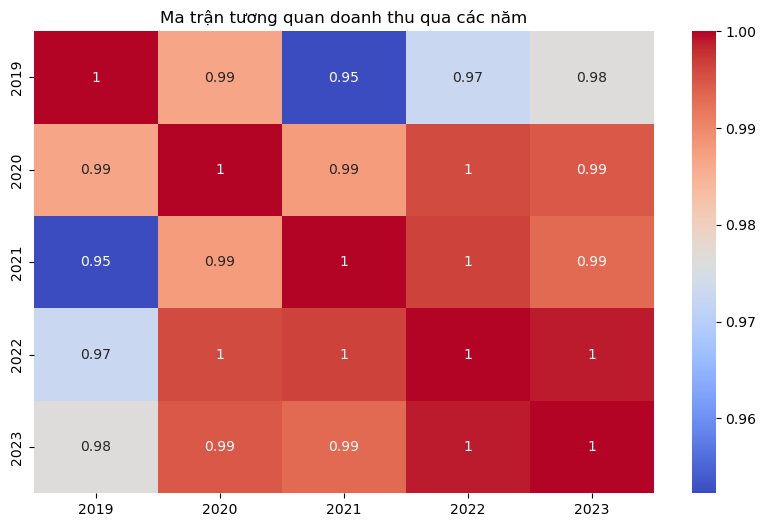

In [242]:
#Biểu đồ tương quan giữa các năm 
plt.figure(figsize=(10,6))
sns.heatmap(clean_df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan doanh thu qua các năm')
plt.show()

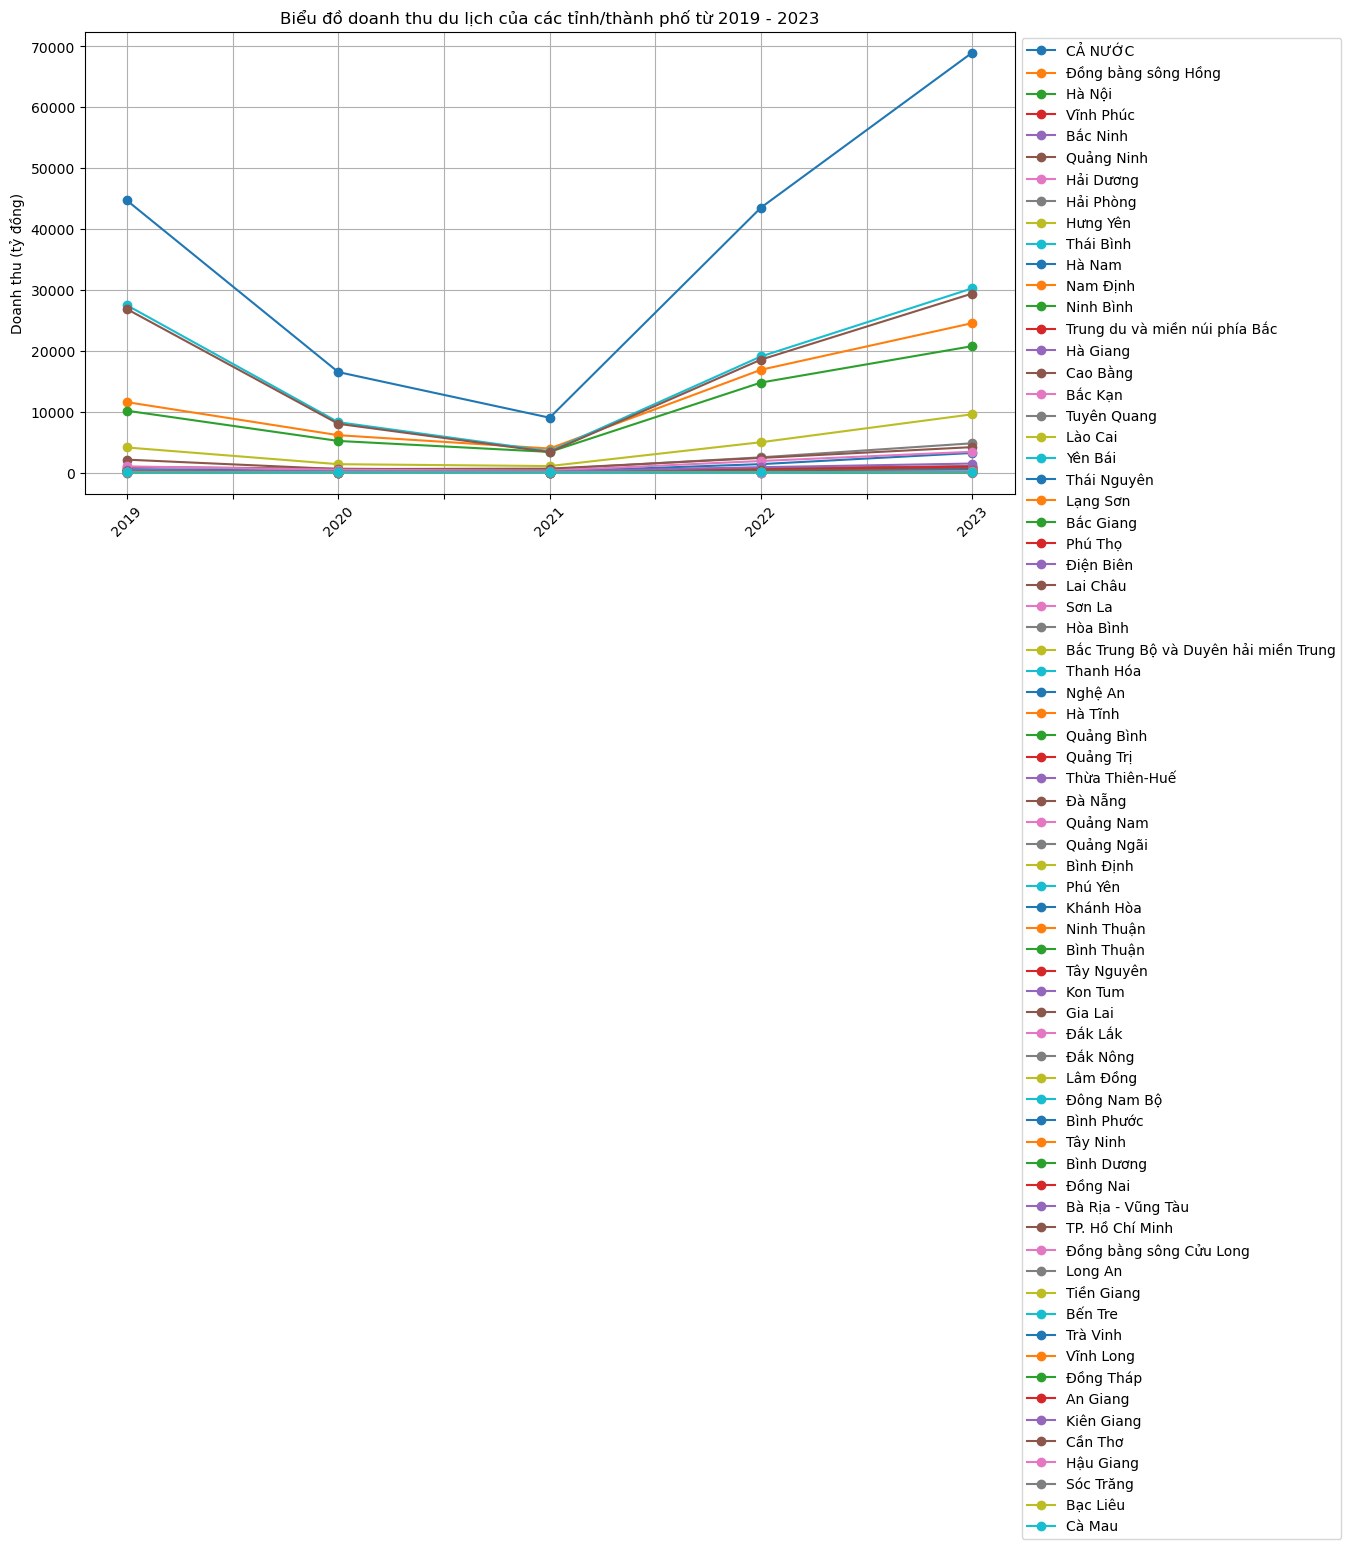

In [244]:
# Biểu đồ line plot cho doanh thu 
clean_df.set_index('Tỉnh/Thành phố').iloc[:, :5].T.plot(figsize=(12, 6), marker='o')
plt.title('Biểu đồ doanh thu du lịch của các tỉnh/thành phố từ 2019 - 2023')
plt.ylabel('Doanh thu (tỷ đồng)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = clean_df[['2019', '2020', '2021', '2022']]
y = clean_df['2023']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

LinearRegression()

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(p)

MAE: 288.91
RMSE: 638.84
R^2 Score: 1.00


C:\Users\Thu Ngan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [254]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập train
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [258]:
# Dự đoán trên tập test
y_pred = rf_model.predict(X_test)

# Đánh giá độ chính xác
mae_rd = mean_absolute_error(y_test, y_pred)
rmse_rd = mean_squared_error(y_test, y_pred, squared=False)
r2_rd = r2_score(y_test, y_pred)

print(f'MAE: {mae_rd:.2f}')
print(f'RMSE: {rmse_rd:.2f}')
print(f'R^2 Score: {r2_rd:.2f}')

MAE: 3591.47
RMSE: 11630.87
R^2 Score: 0.62


C:\Users\Thu Ngan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
